In [35]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as ss
import seaborn as sns

import tensorflow as tf
import keras
from keras import backend as K
from keras import Sequential
from keras.layers import Conv1D, MaxPool1D, Dense, Input, Flatten, Concatenate, Reshape, Lambda

from keras.utils import plot_model
from IPython.display import Image

In [109]:
n_mus = 100
min_x, max_x = -10, 10
min_mu, max_mu = -3, 3

n_data = 10000
n_samples = 1000

In [110]:
mu = np.linspace(min_mu, max_mu, n_data)
x = np.linspace(min_x, max_x, n_samples)

In [111]:
input_data = mu[:, np.newaxis]
data = ss.norm(mu[:, np.newaxis]).logpdf(x[np.newaxis, :])
data.shape

(10000, 1000)

Mu: -1.1998199819981996


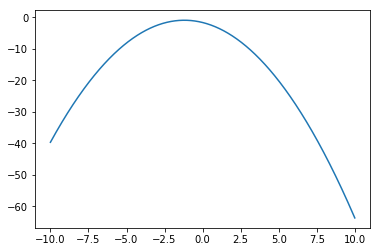

In [112]:
plt.plot(x, data[3000, :])
print('Mu:', mu[3000])

In [125]:
mu_model = Input(shape=(1,))

layer_1 = []
layer_2 = []

for i in range(1, 31):
    layer_1.append(Dense(10, activation='relu', name='layer_1_{:02d}'.format(i))(mu_model))
    layer_2.append(Dense(40, activation='relu', name='layer_2_{:02d}'.format(i))(layer_1[-1]))
        
concat = Concatenate()(layer_2)
print(concat.shape)

reshape = Reshape(target_shape=(1200,1))(concat)

conv = Conv1D(filters=15, kernel_size=201, strides=1)(reshape)
print(conv.shape)

avg = Lambda(lambda x: K.sum(x, axis=2), output_shape=lambda s: (s[0], s[1]))(conv)
print(avg.shape)

model = keras.Model(mu_model, avg)
    
plot_model(model, to_file='model.png') # Requires graphviz to be installed!

(?, 1200)
(?, 1000, 15)
(?, 1000)


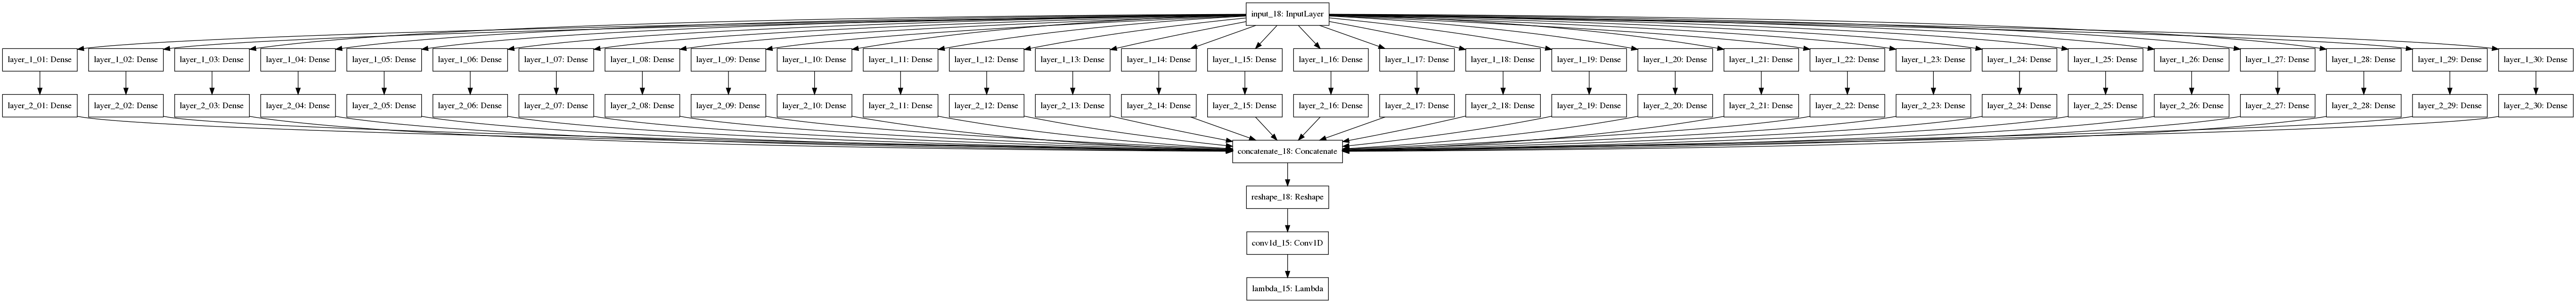

In [126]:
Image(retina=True, filename='model.png')

In [127]:
model.compile(optimizer='adam',
              loss='mean_squared_error')

In [128]:
model.fit(input_data, data, shuffle=True, batch_size=62, epochs=5)

Epoch 1/5
10000/10000 [==============================] - 8s 772us/step - loss: 156.5799
Epoch 2/5
10000/10000 [==============================] - 4s 389us/step - loss: 6.2256
Epoch 3/5
10000/10000 [==============================] - 4s 391us/step - loss: 0.3818
Epoch 4/5
10000/10000 [==============================] - 4s 391us/step - loss: 0.1529
Epoch 5/5
10000/10000 [==============================] - 4s 397us/step - loss: 0.0954


In [129]:
predictions = model.predict(input_data)

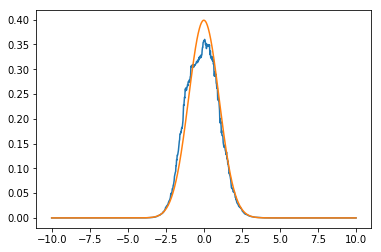

In [130]:
ix = 5000
plt.plot(x, np.exp(predictions[ix, :]))
plt.plot(x, np.exp(data[ix, :]))

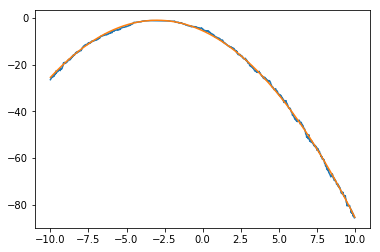

In [131]:
plt.plot(x, predictions[3, :])
plt.plot(x, data[3, :])